<a href="https://colab.research.google.com/github/stefanciprian/rd/blob/main/backtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backtest VIX

In [ ]:
!pip install vectorbt pandas yfinance

: 

In [ ]:
import vectorbt as vbt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2024-11-29')

# Define entry and exit signals
entries = vix_data['Close'] <= 14
exits = vix_data['Close'] >= 20

# Create a portfolio
portfolio = vbt.Portfolio.from_signals(
    vix_data['Close'],
    entries,
    exits,
    init_cash=20000,
    fees=0.001
)

# Simplified Equity Plot
portfolio.total_return().vbt.plot(title="Portfolio Total Return").show()
#portfolio['equity'].vbt.plot(title="Portfolio Equity Curve").show()
#portfolio.drawdowns.plot(title="Portfolio Drawdowns").show()
print(portfolio.drawdowns.records)

# Calculate and plot drawdown depth
drawdown_depth = portfolio.drawdowns.records['peak_val'] - portfolio.drawdowns.records['valley_val']

# Plot drawdown depth over time
# plt.figure(figsize=(10, 6))
# plt.plot(drawdown_depth, label="Drawdown Depth")
# plt.title("Drawdown Depth Over Time")
# plt.xlabel("Drawdown Events")
# plt.ylabel("Depth")
# plt.legend()
# plt.show()

# portfolio.drawdowns.records['valley_val'].vbt.plot(title="Drawdown Valley Values").show()



# QYLP & VYXL

In [ ]:
pip install vectorbt pandas numpy matplotlib yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No price data available for QYLD.L. Skipping.
No price data available for VIXL.L. Skipping.
No price data available for ^GSPC. Skipping.


<ipython-input-11-8b68cdfef9c6>:108: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


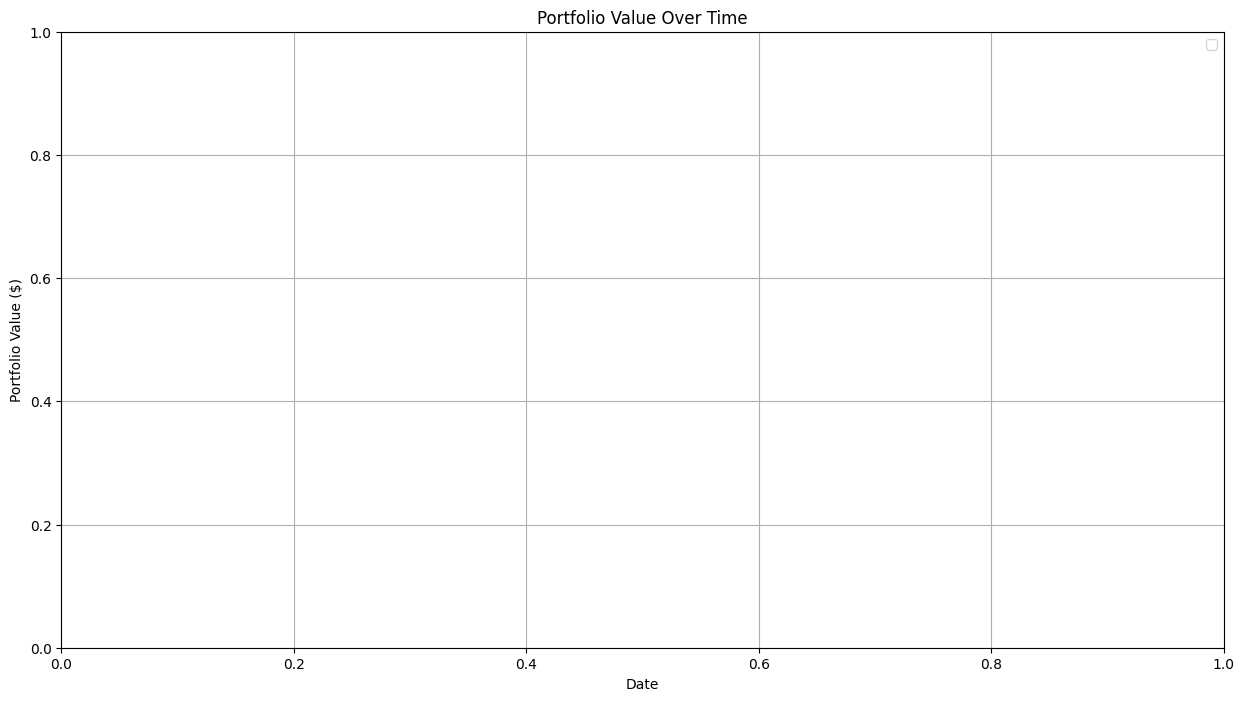

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vectorbt as vbt

def backtest_strategy(ticker, initial_cash=5000, initial_asset=5000, profit_threshold=0.20):
    """
    Backtests a simple buy/sell strategy for a given ticker.

    Args:
        ticker (str): The stock ticker symbol.
        initial_cash (float): The initial cash amount.
        initial_asset (float): The initial asset value.
        profit_threshold (float): The profit percentage threshold for selling.

    Returns:
        pd.DataFrame: A DataFrame containing the backtest results.
    """

    data = yf.download(ticker, start='2023-03-01', end='2025-03-01')

    if data.empty:
        print(f"No data downloaded for {ticker}. Skipping.")
        return pd.DataFrame()  # Return an empty DataFrame

    columns = data.columns.tolist()

    if 'Close' in columns:
        prices = data['Close']
    else:
        print(f"No price data available for {ticker}. Skipping.")
        return pd.DataFrame()

    if prices.empty:
        print(f"No price data available for {ticker}. Skipping.")
        return pd.DataFrame()

    dates = prices.index

    cash = initial_cash
    initial_price = float(prices.iloc[0])  # Convert to float
    assets = initial_asset / initial_price
    portfolio_value = [cash + assets * initial_price]
    cash_values = [cash]
    asset_values = [assets * initial_price]
    positions = [assets]

    in_position = True
    buy_price = initial_price

    for i in range(1, len(prices)):
        current_price = float(prices.iloc[i])  # Convert to float
        current_portfolio_value = cash + assets * current_price
        portfolio_value.append(current_portfolio_value)
        cash_values.append(cash)
        asset_values.append(assets * current_price)
        positions.append(assets)

        if in_position:
            if (current_price / buy_price - 1) >= profit_threshold:
                cash += assets * current_price
                assets = 0
                in_position = False
                buy_price = 0
        else:
            if current_price < buy_price * (1 - profit_threshold):
                assets = cash / current_price
                cash = 0
                in_position = True
                buy_price = current_price

    results = pd.DataFrame({
        'Date': dates,
        'Portfolio Value': portfolio_value,
        'Cash': cash_values,
        'Asset Value': asset_values,
        'Positions': positions,
        'Price': prices,
    })

    return results

def run_parallel_backtests(tickers, initial_cash=5000, initial_asset=5000, profit_threshold=0.20):
    """
    Runs backtests in parallel for multiple tickers and plots the results.

    Args:
        tickers (list): A list of stock ticker symbols.
        initial_cash (float): The initial cash amount.
        initial_asset (float): The initial asset value.
        profit_threshold (float): The profit percentage threshold for selling.
    """

    results = {}
    for ticker in tickers:
        result = backtest_strategy(ticker, initial_cash, initial_asset, profit_threshold)
        if not result.empty: # added check here.
          results[ticker] = result

    plt.figure(figsize=(15, 8))
    for ticker, result in results.items():
        plt.plot(result['Date'], result['Portfolio Value'], label=ticker)

    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    for ticker, result in results.items():
        print(f"Final portfolio value for {ticker}: ${result['Portfolio Value'].iloc[-1]:.2f}")
        print(f"Final cash for {ticker}: ${result['Cash'].iloc[-1]:.2f}")
        print(f"Final position size for {ticker}: {result['Positions'].iloc[-1]:.2f}")

# Run the backtests
tickers = ['QYLD.L', 'VIXL.L', '^GSPC']
run_parallel_backtests(tickers)

# Test

In [ ]:
import numpy as np

symbols = ["^VIX-USD"] #, "QYLD.L-USD"]
price = vbt.YFData.download(symbols, missing_index='drop').get('Close')

n = np.random.randint(10, 101, size=1000).tolist()
pf = vbt.Portfolio.from_random_signals(price, n=n, init_cash=100, seed=42)

mean_expectancy = pf.trades.expectancy().groupby(['randnx_n', 'symbol']).mean()
fig = mean_expectancy.unstack().vbt.scatterplot(xaxis_title='randnx_n', yaxis_title='mean_expectancy')
fig.show()

symbols = ["VIXL.L-USD", "QYLD.L-USD"]
price = vbt.YFData.download(symbols, missing_index='drop').get('Close')

windows = np.arange(2, 101)
fast_ma, slow_ma = vbt.MA.run_combs(price, window=windows, r=2, short_names=['fast', 'slow'])
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf_kwargs = dict(size=np.inf, fees=0.001, freq='1D')
pf = vbt.Portfolio.from_signals(price, entries, exits, **pf_kwargs)

fig = pf.total_return().vbt.heatmap(
    x_level='fast_window', y_level='slow_window', slider_level='symbol', symmetric=True,
    trace_kwargs=dict(colorbar=dict(title='Total return', tickformat='%')))
fig.show()

pf[(10, 20, 'VIXL.L-USD')].stats()

ERROR:yfinance:$^VIX-USD: possibly delisted; no timezone found


KeyError: 'symbol'

# Zipline

In [ ]:
!apt-get update
!apt-get install -y build-essential

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,796 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [ ]:
!pip install --force-reinstall --no-binary :all: bcolz cyordereddict

  Using cached bcolz-1.2.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached cyordereddict-1.0.0.tar.gz (138 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 79.8 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [ ]:
pip install yfinance pandas matplotlib zipline

  Using cached zipline-1.4.1.tar.gz (5.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached logbook-1.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.6 kB)
  Using cached python-interface-1.6.1.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of zipline to determine which version is compatible with other requirements. This could take a while.
  Using cached zipline-1.4.0.tar.gz (5.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached zipline-1.3.0.tar.gz (2.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached requests_file-2.1.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached zipline-1.2.0.tar.gz (659 kB)
  Preparing metadata (setup.py) ... done
  Using cached zipline-1.1.1.tar.gz (640 kB)
  Preparing metadata (setup.py) ... done
  Using cached zipline-1.1.0.tar.gz (433 kB)
  Preparing metadata (setup.py) ..

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from zipline.api import order, record, symbol, schedule_function
from zipline.utils.events import date_rules, time_rules
from zipline import run_algorithm

def initialize(context):
    context.asset = symbol("VIX")
    context.last_buy_price = None  # Store last buy price
    context.held = False  # Track if we own VIX

    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())

def rebalance(context, data):
    current_price = data.current(context.asset, "price")

    if not context.held:  # Buy condition
        if context.last_buy_price is None or current_price <= context.last_buy_price:
            order(context.asset, 10)
            context.last_buy_price = current_price
            context.held = True
    else:  # Sell condition: 30% profit
        if current_price >= context.last_buy_price * 1.3:
            order(context.asset, -10)
            context.held = False  # Reset position

    record(VIX=current_price, last_buy=context.last_buy_price, held=int(context.held))

# Fetch VIX data from Yahoo Finance
def get_vix_data():
    vix = yf.download("^VIX", start="2015-01-01", end="2023-01-01")
    df = vix[["Adj Close"]].rename(columns={"Adj Close": "price"})
    df.index = df.index.tz_localize("UTC")  # Zipline requires UTC timestamps
    return df

# Run backtest
start = pd.Timestamp("2015-01-01", tz="utc")
end = pd.Timestamp("2023-01-01", tz="utc")

vix_data = get_vix_data()

result = run_algorithm(
    start=start, end=end, initialize=initialize,
    capital_base=10000, data_frequency="daily",
    data=vix_data
)

# Plot portfolio performance
result.portfolio_value.plot()
plt.title("VIX 30% Profit Strategy Performance")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()


ModuleNotFoundError: No module named 'zipline'

# Portfolio Testing

In [1]:
!pip install numpy pandas scipy pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=a1be8fcd830953b24e05a32454947c2aafe4ca7aa2c082e4e18f139d4fa8547a
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [21]:
import numpy as np
import pandas as pd
from pyswarm import pso  # Make sure pyswarm is installed

# === 1. Load Data ===
df = pd.read_csv("https://raw.githubusercontent.com/stefanciprian/rd/main/assets/dummy_financial_data.csv", index_col='Date', parse_dates=True)
returns = df.pct_change().dropna()

# === 2. Annualized stats ===
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_assets = len(expected_returns)

print(returns.isnull().sum().sum())          # Should be 0
print(np.any(np.isnan(expected_returns)))    # Should be False
print(np.any(np.isnan(cov_matrix.values)))   # Should be False

# === 3. PSO Objective with Penalty ===
def sharpe_ratio_normalized(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    weights = np.array(weights)

    # Normalize weights at each step to ensure they sum to 1
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    if portfolio_volatility == 0:
        return 1e10  # Penalize zero volatility

    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe  # minimize negative Sharpe ratio



# === 4. Bounds ===
lb = [0] * num_assets  # Lower bounds: no shorting
ub = [1] * num_assets  # Upper bounds: 100% max per asset

# === 5. Run PSO ===
optimal_weights, neg_sharpe = pso(
    sharpe_ratio_penalized,
    lb, ub,
    args=(expected_returns, cov_matrix, 0.02),
    swarmsize=100,
    maxiter=200
)

# Normalize the final weights (just in case)
optimal_weights /= np.sum(optimal_weights)

# Display top 10 portfolio allocations
sorted_indices = np.argsort(optimal_weights)[-10:][::-1]
print("\n✅ Optimal Portfolio Allocation (Top 10 Assets):")
for i in sorted_indices:
    print(f"{df.columns[i]}: {optimal_weights[i] * 100:.2f}%")

print(f"\n📊 Sum of Weights: {np.sum(optimal_weights):.4f}")
print(f"⭐ Optimal Sharpe Ratio: {-neg_sharpe:.4f}")



0
False
False
Stopping search: Swarm best position change less than 1e-08

✅ Optimal Portfolio Allocation (Top 10 Assets):
Asset6: 3.99%
Asset16: 3.99%
Asset49: 3.99%
Asset25: 3.98%
Asset65: 3.98%
Asset92: 3.83%
Asset90: 3.59%
Asset40: 3.48%
Asset41: 3.19%
Asset96: 3.18%

📊 Sum of Weights: 1.0000
⭐ Optimal Sharpe Ratio: -579148315.6332


In [14]:
import numpy as np
import pandas as pd

# Function to calculate the Sharpe ratio
def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    weights = np.array(weights)

    # Normalize weights to ensure they sum to 1
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    if portfolio_volatility == 0:
        return -1e10  # Penalize portfolios with zero volatility

    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility
    return sharpe

# Genetic Algorithm Functions

# 1. Initialize population: Random weights
def initialize_population(pop_size, num_assets):
    population = np.random.rand(pop_size, num_assets)
    # Normalize to ensure each portfolio's weights sum to 1
    population = population / population.sum(axis=1)[:, np.newaxis]
    return population

# 2. Selection: Select the best individuals based on Sharpe ratio
def selection(population, expected_returns, cov_matrix, risk_free_rate=0.02):
    fitness = np.array([sharpe_ratio(ind, expected_returns, cov_matrix, risk_free_rate) for ind in population])
    sorted_indices = np.argsort(fitness)[::-1]  # Sort in descending order of fitness
    return population[sorted_indices[:len(population)//2]]  # Select top 50%

# 3. Crossover: Combining two parents to produce offspring
def crossover(parents, crossover_rate=0.8):
    num_parents = len(parents)
    offspring = []

    for _ in range(num_parents // 2):
        if np.random.rand() < crossover_rate:
            # Randomly select two parents
            parent1, parent2 = parents[np.random.randint(0, num_parents)], parents[np.random.randint(0, num_parents)]
            # Perform one-point crossover
            crossover_point = np.random.randint(1, len(parent1))
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offspring.extend([child1, child2])
        else:
            offspring.extend([parents[np.random.randint(0, num_parents)], parents[np.random.randint(0, num_parents)]])

    return np.array(offspring)

# 4. Mutation: Small random changes to offspring
def mutation(offspring, mutation_rate=0.1):
    num_offspring = len(offspring)

    for i in range(num_offspring):
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(0, len(offspring[i]))
            # Introduce a small mutation: randomly change one weight
            offspring[i][mutation_point] = np.random.rand()
            # Normalize the mutated weights
            offspring[i] /= np.sum(offspring[i])

    return offspring

# 5. GA Main Loop: Run for a given number of generations
def genetic_algorithm(df, pop_size=50, generations=100, crossover_rate=0.8, mutation_rate=0.1, risk_free_rate=0.02):
    expected_returns = df.pct_change().mean()
    cov_matrix = df.pct_change().cov()

    # Initialize the population of portfolios
    population = initialize_population(pop_size, df.shape[1])

    for generation in range(generations):
        # Selection: Choose the best individuals
        parents = selection(population, expected_returns, cov_matrix, risk_free_rate)

        # Crossover: Create offspring by combining parents
        offspring = crossover(parents, crossover_rate)

        # Mutation: Apply mutation to the offspring
        population = mutation(offspring, mutation_rate)

        # Ensure population is not empty (if mutation or crossover leads to an issue)
        if len(population) == 0:
            population = initialize_population(pop_size, df.shape[1])  # Re-initialize the population

        # Evaluate fitness (Sharpe ratio) of the best portfolio
        best_fitness = sharpe_ratio(population[0], expected_returns, cov_matrix, risk_free_rate)

        print(f"Generation {generation + 1}, Best Sharpe Ratio: {best_fitness:.4f}")

    # Return the best solution after all generations
    best_solution = population[0]
    return best_solution

# Load dummy data (you should replace this with actual financial data)
df = pd.read_csv("https://raw.githubusercontent.com/stefanciprian/rd/main/assets/dummy_financial_data.csv", index_col='Date', parse_dates=True)

# Run the genetic algorithm
best_portfolio = genetic_algorithm(df, generations=50, pop_size=100)

# Print the optimal portfolio allocation
print("\nOptimal Portfolio Allocation (Top 10 Assets):")
for i, weight in enumerate(best_portfolio[:10]):
    print(f"Asset{i+1}: {weight*100:.2f}%")


Generation 1, Best Sharpe Ratio: -8.1452
Generation 2, Best Sharpe Ratio: -8.0567
Generation 3, Best Sharpe Ratio: -3.6357
Generation 4, Best Sharpe Ratio: -2.3438
Generation 5, Best Sharpe Ratio: -2.6526
Generation 6, Best Sharpe Ratio: -7.9570
Generation 7, Best Sharpe Ratio: -8.1612
Generation 8, Best Sharpe Ratio: -1.9881
Generation 9, Best Sharpe Ratio: -7.9780
Generation 10, Best Sharpe Ratio: -3.4712
Generation 11, Best Sharpe Ratio: -2.2211
Generation 12, Best Sharpe Ratio: -8.0916
Generation 13, Best Sharpe Ratio: -8.2400
Generation 14, Best Sharpe Ratio: -7.9037
Generation 15, Best Sharpe Ratio: -8.0505
Generation 16, Best Sharpe Ratio: -3.9008
Generation 17, Best Sharpe Ratio: -2.0323
Generation 18, Best Sharpe Ratio: -7.9915
Generation 19, Best Sharpe Ratio: -7.9777
Generation 20, Best Sharpe Ratio: -5.0757
Generation 21, Best Sharpe Ratio: -4.8805
Generation 22, Best Sharpe Ratio: -3.1073
Generation 23, Best Sharpe Ratio: -2.7225
Generation 24, Best Sharpe Ratio: -8.1115
G

Optimal Portfolio Allocation (Max Sharpe Ratio):
Portfolio Return: 147.8519
Portfolio Volatility: 30.2533
Optimal Sharpe Ratio: 4.8868


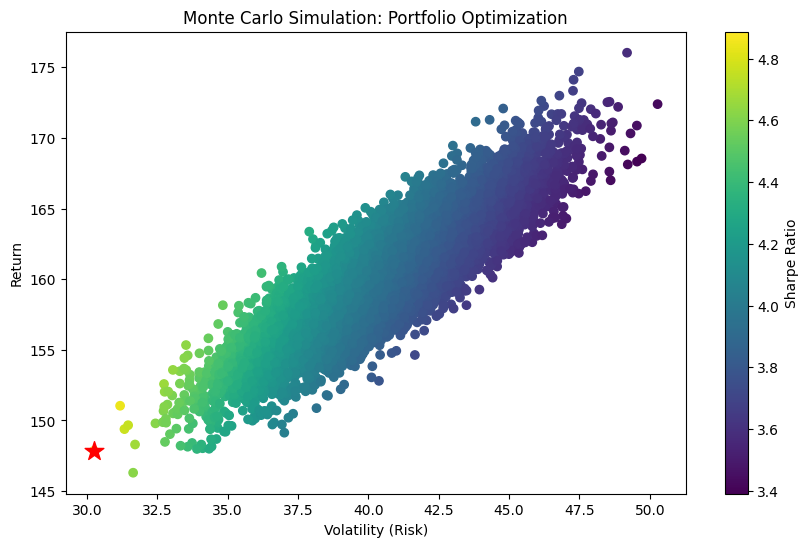


Top 10 Assets with Allocations:
Asset96: 3.18%
Asset41: 3.19%
Asset40: 3.48%
Asset90: 3.59%
Asset92: 3.83%
Asset65: 3.98%
Asset25: 3.98%
Asset49: 3.99%
Asset16: 3.99%
Asset6: 3.99%


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load dummy data (you should replace this with actual financial data)
df = pd.read_csv("https://raw.githubusercontent.com/stefanciprian/rd/main/assets/dummy_financial_data.csv", index_col='Date', parse_dates=True)


# Calculate the mean and covariance of the returns
mean_returns = df.mean()
cov_matrix = df.cov()

# Monte Carlo Simulation
num_portfolios = 10000  # Number of random portfolios to simulate
risk_free_rate = 0.01   # Example risk-free rate

results = np.zeros((3, num_portfolios))  # Store results: [Portfolio Return, Portfolio Volatility, Sharpe Ratio]

for i in range(num_portfolios):
    # Generate random portfolio weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize to make sure they sum to 1

    # Portfolio return is the weighted sum of asset returns
    portfolio_return = np.sum(weights * mean_returns)

    # Portfolio volatility (standard deviation of returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Calculate the Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Store the results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = sharpe_ratio

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# Find the portfolio with the highest Sharpe ratio
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]

# Display the results of the best portfolio
print(f"Optimal Portfolio Allocation (Max Sharpe Ratio):")
print(f"Portfolio Return: {max_sharpe_portfolio['Return']:.4f}")
print(f"Portfolio Volatility: {max_sharpe_portfolio['Volatility']:.4f}")
print(f"Optimal Sharpe Ratio: {max_sharpe_portfolio['Sharpe Ratio']:.4f}")

# Plot the efficient frontier
plt.figure(figsize=(10,6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o')
plt.title('Monte Carlo Simulation: Portfolio Optimization')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the maximum Sharpe ratio
plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], color='red', marker='*', s=200)
plt.show()

# Get the top 10 assets by allocation
top_10_assets_idx = np.argsort(optimal_weights)[-10:]  # Get indices of top 10 assets
top_10_assets = df.columns[top_10_assets_idx]  # Get asset names
top_10_allocations = optimal_weights[top_10_assets_idx]  # Get corresponding allocations

# Display the top 10 assets and their allocations
print("\nTop 10 Assets with Allocations:")
for i, asset in enumerate(top_10_assets):
    print(f"{asset}: {top_10_allocations[i]*100:.2f}%")


In [25]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 89.7 MB/s eta 0:00:00


Optimal Portfolio Allocation (QAOA):
Asset 1: 18.82%
Asset 2: 11.33%
Asset 3: 11.97%
Asset 4: 8.72%
Asset 5: 17.06%
Asset 6: 5.99%
Asset 7: 2.91%
Asset 8: 14.08%
Asset 9: 9.13%


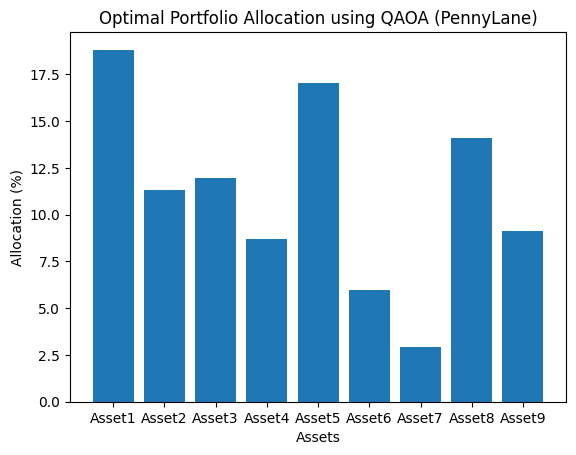

In [38]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # added import to avoid NameError

# Define a function to compute the portfolio variance (simplified)
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Generate some random financial data (as an example)
df = pd.read_csv("https://raw.githubusercontent.com/stefanciprian/rd/main/assets/dummy_financial_data.csv", index_col='Date', parse_dates=True)

# Take only the first 64 assets
df = df.iloc[:, :9]

num_assets = df.shape[1]

# Calculate the covariance matrix
cov_matrix = df.cov()

# Convert the covariance matrix to a NumPy array
cov_matrix_array = cov_matrix.to_numpy() # convert to numpy array

# QAOA for portfolio optimization
dev = qml.device("default.qubit", wires=num_assets)

@qml.qnode(dev)
def qaoa_circuit(params, num_assets, cov_matrix_array):
    # Apply the initial Hadamard gate to all qubits (create superposition)
    for i in range(num_assets):
        qml.Hadamard(wires=i)

    # Apply the QAOA cost and mixing operators
    for layer in range(len(params) // 2):
        # Apply the cost function (portfolio variance as the cost)
        for i in range(num_assets):
            qml.RZ(2 * params[2 * layer] * cov_matrix_array[i, i], wires=i) # use numpy array
            for j in range(i + 1, num_assets):
                qml.CNOT(wires=[i, j])
                qml.RZ(2 * params[2 * layer] * cov_matrix_array[i, j], wires=j) # use numpy array
                qml.CNOT(wires=[i, j])

        # Apply the mixing function (X gate)
        for i in range(num_assets):
            qml.RX(2 * params[2 * layer + 1], wires=i)

    # Measure the circuit
    return [qml.expval(qml.PauliZ(i)) for i in range(num_assets)]

# Optimization routine using classical optimizer
from scipy.optimize import minimize

def optimize_portfolio(cov_matrix_array, num_assets, max_layers=3):
    # Initialize the parameters (angles) for QAOA
    init_params = np.random.uniform(0, 2 * np.pi, size=(2 * max_layers))

    # Define the cost function to minimize (portfolio variance)
    def cost(params):
        result = qaoa_circuit(params, num_assets, cov_matrix_array)
        # Convert the result to portfolio weights
        portfolio_weights = np.array(result)
        # Compute the portfolio variance as the cost
        return portfolio_variance(portfolio_weights, cov_matrix_array)

    # Use the classical optimizer (COBYLA) to minimize the cost function
    opt_result = minimize(cost, init_params, method="COBYLA", options={"maxiter": 100})
    return opt_result

# Run the optimization
opt_result = optimize_portfolio(cov_matrix_array, num_assets)

# Get the optimal portfolio allocation (weights)
optimal_weights = np.array(qaoa_circuit(opt_result.x, num_assets, cov_matrix_array))
optimal_weights = np.abs(optimal_weights)  # Take absolute values to avoid negative weights
optimal_weights /= np.sum(optimal_weights)  # Normalize to sum to 1

# Display the optimal portfolio allocation
print("Optimal Portfolio Allocation (QAOA):")
for i, weight in enumerate(optimal_weights):
    print(f"Asset {i+1}: {weight * 100:.2f}%")

# Plot the allocation
plt.bar([f'Asset{i+1}' for i in range(num_assets)], optimal_weights * 100)
plt.xlabel('Assets')
plt.ylabel('Allocation (%)')
plt.title('Optimal Portfolio Allocation using QAOA (PennyLane)')
plt.show()